In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_excel("cleaned_advertising_data.xlsx")
df.head()

,sales,total_sales
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


**x & y**

In [3]:
x=df[["total_sales"]]
y=df["sales"]

In [4]:
# finding best Random State for given dataset

train=[]
cv=[]

for i in range(0,100):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)

    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(x_train,y_train)
    
    ypred_train=model.predict(x_train)
    
    from sklearn.metrics import r2_score
    train.append(r2_score(ypred_train,y_train))
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model, x_train, y_train, cv=5).mean())
    

em=pd.DataFrame({"Train":train,"CV":cv})
gm=em[(abs(em["Train"]-em["CV"])<=0.05)]

rs=gm[gm["CV"]==gm["CV"].max()].index.tolist()[0]
print("Best random state value is :",rs)

Best random state value is : 2


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## **Modelling Linear Regression**

In [6]:
# identify the realtion in terms of equation

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

print("Coefficient - ",model.coef_)
print("Intercept   - ",model.intercept_)

Coefficient -  [0.05100478]
Intercept   -  4021.4705059140524


**Interpreting the coefficients**

- a 1 unit increse in total spend is associated with an increse of 0.04784 units in sales
- this basically means that for every $ 10000 dollars spend on Ads we could expect 478 more units sold

In [7]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.8,random_state=2)

import statsmodels.formula.api as smf
model1=smf.ols("y_train~x_train",data=df_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     694.9
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           9.93e-60
Time:                        11:40:22   Log-Likelihood:                -1467.1
No. Observations:                 160   AIC:                             2938.
Df Residuals:                     158   BIC:                             2944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4021.4705    426.914      9.420      0.000    3178.277    4864.664
x_train        0.0510      0.002     26.362      0.000       0.047       0.055
==============================================================================
Omnibus:                        4.140   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                3.838
Skew:                          -0.376   Prob(JB):                        0.147
Kurtosis:                       3.098   Cond. No.                     5.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Evaluation**

In [8]:
# predictions on train data

ypred_train=model.predict(x_train)

from sklearn.metrics import r2_score,mean_squared_error
print("Train R2",r2_score(y_train,ypred_train))
print("Train RMSE",mean_squared_error(y_train,ypred_train))

Train R2 0.8147600798823176
Train RMSE 5391953.175039993


**cross val score**

In [9]:
from sklearn.model_selection import cross_val_score
print("Train cv",cross_val_score(model,x_train,y_train,cv=5,scoring="r2").mean())

Train cv 0.8048349207786423


In [10]:
# predictions on test data

ypred_test=model.predict(x_test)
print("Test R2",r2_score(y_test,ypred_test))
print("Test RMSE",mean_squared_error(y_test,ypred_test))

Test R2 0.33133478476230016
Test RMSE 12421421.758444775


**Linearity of Errors**

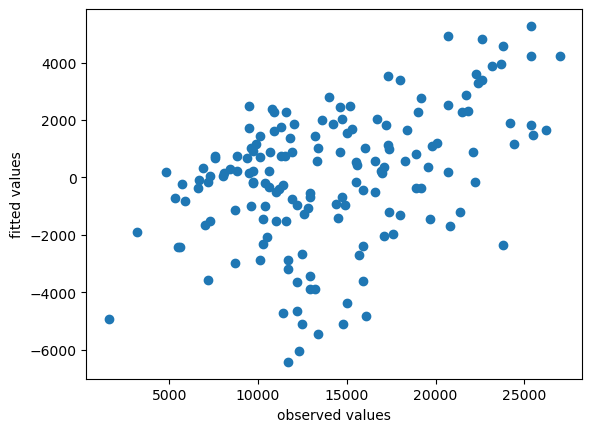

In [11]:
train_error=y_train - ypred_train

plt.scatter(y_train,train_error)
plt.xlabel('observed values')
plt.ylabel('fitted values')
plt.show()

**Normality of errors**

In [14]:
train_error.skew()

-0.3797505350296964

**Equal varience of errors**

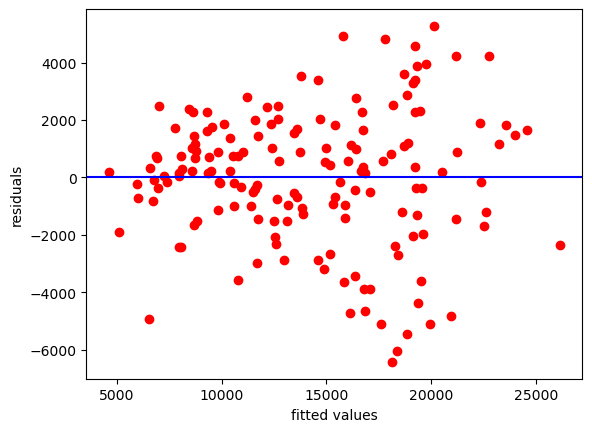

In [15]:
plt.scatter(ypred_train,train_error,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()

**Predictions**

In [16]:
model.predict([[100000]])

array([9121.9481372])

**Save a Model**

In [17]:
#from pickle import dump
#dump(model,open('sales_model.pkl','wb')